# SLR Study

## Kindly change the below cells from markdown to code and execute it 

In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm

In [4]:
import pandas as pd
from sklearn.datasets import load_boston
load = load_boston()
df = pd.DataFrame(data = load.data, columns = load.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


### Data Understanding (8 marks)
a. Read the dataset (tab, csv, xls, txt, inbuilt dataset). What are the number of rows and no. of cols & types of variables (continuous, categorical etc.)? (1 MARK)

b. Calculate five-point summary for numerical variables (1 MARK)

c. Summarize observations for categorical variables – no. of categories, % observations in each category. (2 marks)

d. Check for defects in the data such as missing values, null, outliers, etc. (4 marks)

In [5]:
#a.
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [6]:
#b.
df.describe().drop(['mean','count','std'],axis=0)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
min,0.006320,0.0,0.46,0.0,0.385,3.5610,2.900,1.129600,1.0,187.0,12.60,0.3200,1.730
25%,0.082045,0.0,5.19,0.0,0.449,5.8855,45.025,2.100175,4.0,279.0,17.40,375.3775,6.950
50%,0.256510,0.0,9.69,0.0,0.538,6.2085,77.500,3.207450,5.0,330.0,19.05,391.4400,11.360
75%,3.677083,12.5,18.10,0.0,0.624,6.6235,94.075,5.188425,24.0,666.0,20.20,396.2250,16.955
max,88.976200,100.0,27.74,1.0,0.871,8.7800,100.000,12.126500,24.0,711.0,22.00,396.9000,37.970


In [7]:
#c.
df.info()
# There are no categorical variables in the given data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [8]:
#d.
df.isnull().sum()
# There are no missing values in the dataset

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [9]:
df['CHAS'].value_counts()

0.0    471
1.0     35
Name: CHAS, dtype: int64

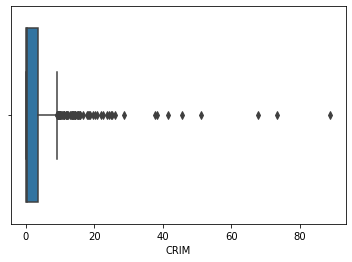

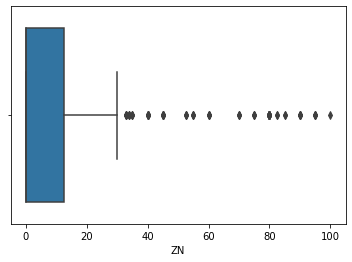

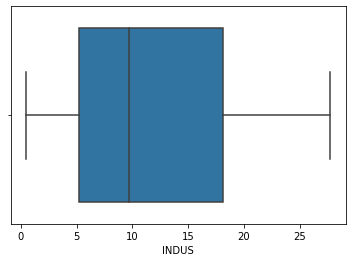

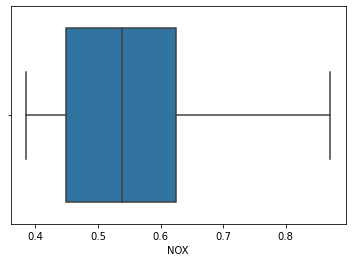

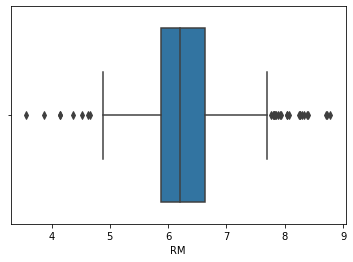

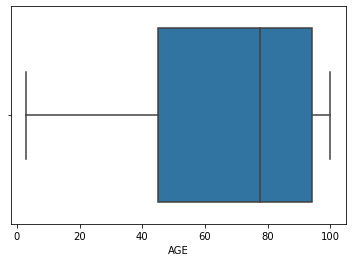

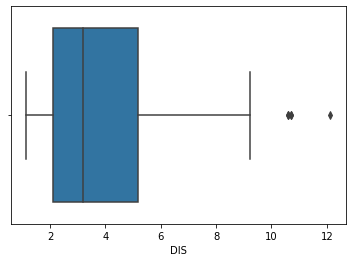

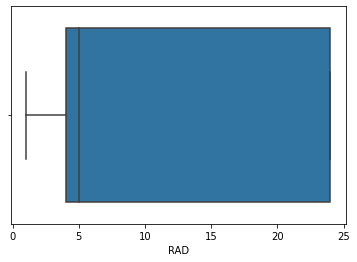

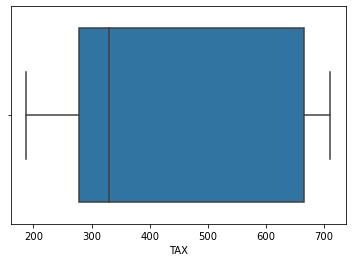

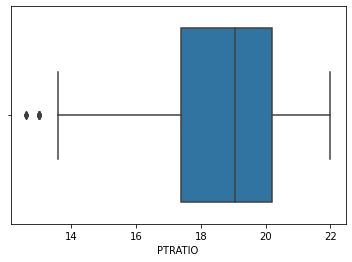

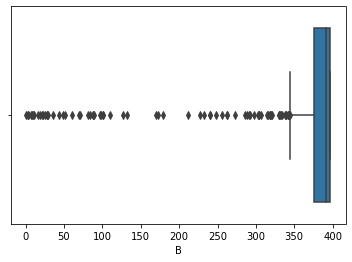

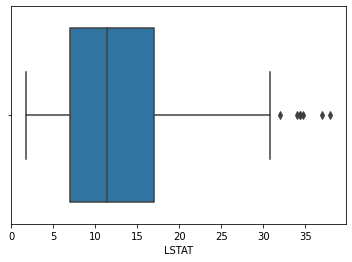

In [10]:
for i in df.columns.drop('CHAS'):
    sns.boxplot(x = df[i])
    plt.show()

#### 2. Data Preparation (17 marks)

a. Fix the defects found above and do appropriate treatment if any. (4 marks)

b. Visualize the data using relevant plots. Find out the variables which are highly correlated with target variable? (5 marks)

c. Do you want to exclude some variables from the model based on this analysis? What other actions will you take? (4 marks)

d. Split dataset into train and test (70:30). Are both train and test representative of the overall data? How would you ascertain this statistically? (4 marks)

In [11]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993


In [34]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [35]:
df.loc[4,'CRIM']

0.06905

In [12]:
for col in df.columns:
    q1 = np.quantile(df[col],0.25)
    q3 = np.quantile(df[col],0.75)
    iqr = q3-q1
    ll = q1-(1.5*iqr)
    ul = q3+(1.5*iqr)
    for ind in df[col].index:
        if df.loc[ind,col]<ll:
            df.loc[ind,col]=ll
        if df.loc[ind,col]>ul:
            df.loc[ind,col]=ul

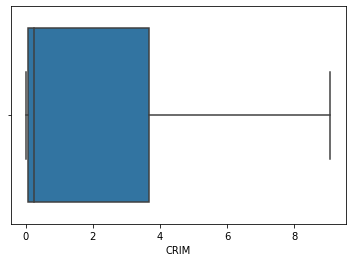

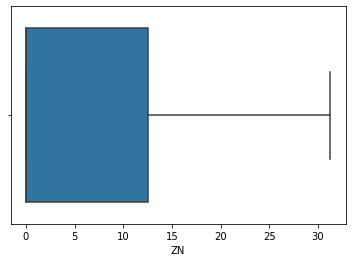

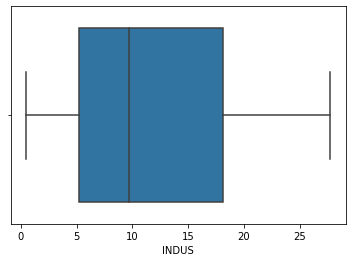

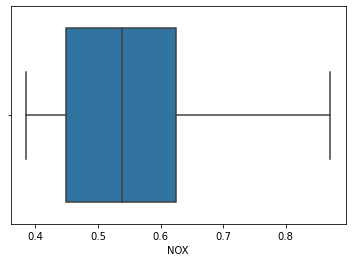

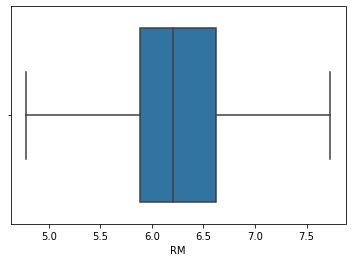

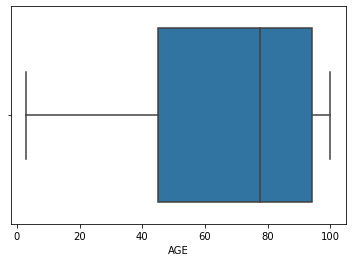

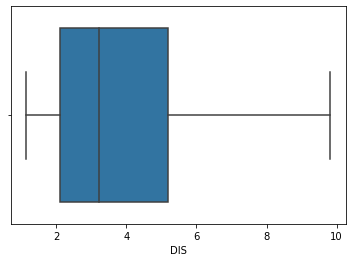

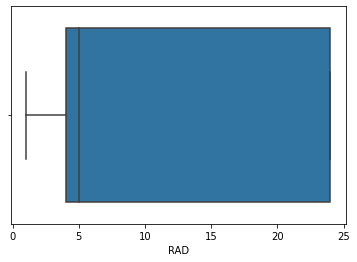

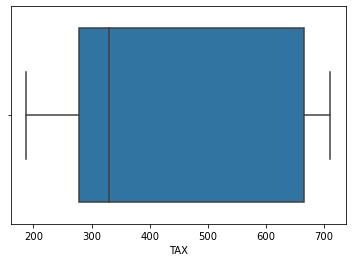

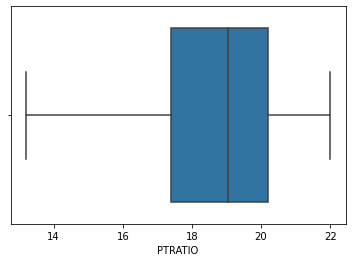

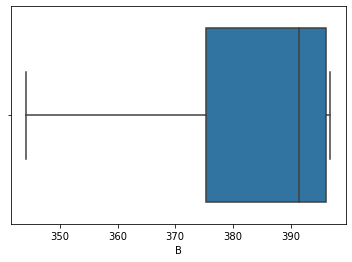

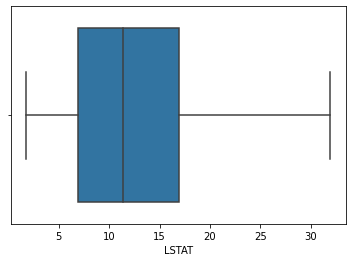

In [13]:
for i in df.columns.drop('CHAS'):
    sns.boxplot(x = df[i])
    plt.show()

In [14]:
from sklearn.model_selection import train_test_split
dfx = df.drop('LSTAT',axis=1)
dfy = df[['LSTAT']]
train_x, test_x, train_y, test_y = train_test_split(dfx,dfy,test_size=0.3,random_state=1)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(train_x)
train_x_scaled = scaler.transform(train_x)
test_x_scaled = scaler.transform(test_x)
train_x_scaled = pd.DataFrame(train_x_scaled,index= train_x.index,columns=train_x.columns)
test_x_scaled = pd.DataFrame(test_x_scaled,index= test_x.index,columns=test_x.columns)

In [15]:
train_x_scaled

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B
13,-0.492125,-0.579741,-0.462096,0.0,-0.146701,-0.480206,-0.251175,0.424769,-0.645983,-0.600195,1.196993,0.790501
61,-0.629798,1.514639,-0.901510,0.0,-0.867913,-0.453169,0.868243,1.430915,-0.190903,-0.735510,0.584454,-0.205789
377,2.044586,-0.579741,0.991914,0.0,0.981782,0.863674,1.059536,-1.171672,1.629421,1.511905,0.820046,0.790501
39,-0.673103,2.038234,-1.219757,0.0,-1.080034,0.547186,-1.668159,0.755353,-0.759754,-0.923775,-0.075203,0.723270
365,0.687916,-0.579741,0.991914,0.0,1.380570,-2.341756,0.673408,-1.050039,1.629421,1.511905,0.820046,-1.443475
...,...,...,...,...,...,...,...,...,...,...,...,...
255,-0.670743,2.038234,-1.119028,0.0,-1.385488,-0.596304,-1.763806,2.575663,-0.987294,-0.553129,-0.970452,0.699448
72,-0.653864,-0.579741,-0.072316,0.0,-1.207306,-0.295720,-2.164104,0.701113,-0.645983,-0.611961,0.348862,0.473403
396,1.083511,-0.579741,0.991914,0.0,1.168449,0.245012,0.960347,-1.019725,1.629421,1.511905,0.820046,0.790501
235,-0.582087,-0.579741,-0.745306,0.0,-0.409731,-0.262322,-0.261802,-0.078352,-0.190903,-0.600195,-0.499269,-0.276196


### 3. Model Building (25 marks)

a. Fit a base model and observe the overall R- Squared, RMSE and MAPE values of the model. Please comment on whether it is good or not. (6 marks)

b. Check for multi-collinearity and treat the same. (4 marks)

c. How would you improve the model? Write clearly the changes that you will make before re-fitting the model. Fit the final model. (7 marks)

d. Write down a business interpretation/explanation of the model – which variables are affecting the target the most and explain the relationship. Feel free to use charts or graphs to explain. (4 marks)

e. What changes from the base model had the most effect on model performance? (4 marks)

In [51]:
X = sm.add_constant(train_x_scaled)
y = train_y
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  LSTAT   R-squared:                       0.690
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     69.10
Date:                Thu, 11 Nov 2021   Prob (F-statistic):           5.43e-80
Time:                        16:36:06   Log-Likelihood:                -988.84
No. Observations:                 354   AIC:                             2002.
Df Residuals:                     342   BIC:                             2048.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.9032      0.214     60.369      0.000      12.483      13.324
CRIM           3.9982      0.619      6.458      0.000       2.780       5.216
ZN             0.3180      0.360      0.884      0.378      -0.390       1.026
INDUS          0.6405      0.428      1.497      0.135      -0.201       1.482
CHAS        2.059e-15    4.7e-16      4.384      0.000    1.14e-15    2.98e-15
NOX            0.3332      0.452      0.738      0.461      -0.555       1.221
RM            -2.9508      0.254    -11.635      0.000      -3.450      -2.452
AGE            2.6780      0.355      7.551      0.000       1.980       3.376
DIS            0.8278      0.448      1.849      0.065      -0.053       1.708
RAD           -2.1267      0.762     -2.790      0.006      -3.626      -0.628
TAX           -0.2495      0.653     -0.382      0.703      -1.534       1.035
PTRATIO        0.3206      0.306      1.046      0.296      -0.282       0.923
B             -0.0074      0.249     -0.030      0.976      -0.496       0.481
==============================================================================
Omnibus:                       25.922   Durbin-Watson:                   1.738
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               76.171
Skew:                          -0.250   Prob(JB):                     2.88e-17
Kurtosis:                       5.217   Cond. No.                     3.70e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.58e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [52]:
X = sm.add_constant(train_x_scaled)
train_y_pred = model.predict(X)
train_y_pred

13     13.403809
61     15.625477
377    17.589538
39      6.079207
365    20.839758
         ...    
255    10.780769
72      6.948204
396    15.494823
235    10.183377
37     10.190124
Length: 354, dtype: float64

In [53]:
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(train_y,train_y_pred,squared=False)
rmse

3.9527192225330583

In [54]:
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(train_y,train_y_pred)
mape

0.29788356139021177

In [20]:
model.rsquared

0.6896984096835842

In [21]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
for i in range(len(X.columns)):
    if i != 0:
        vif = variance_inflation_factor(X.values,i)
        print(i, X.columns[i], vif)

1 CRIM 8.391492900219804
2 ZN 2.8363233934877448
3 INDUS 4.006308543643143
4 CHAS nan
5 NOX 4.462976283302237
6 RM 1.4078717858945378
7 AGE 2.7530748729575896
8 DIS 4.388536902350848
9 RAD 12.71530518303524
10 TAX 9.335439720300686
11 PTRATIO 2.055354521216374
12 B 1.352023917084192


D:\Data Science\lib\site-packages\statsmodels\regression\linear_model.py:1715: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


In [22]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.linear_model import LinearRegression
lereg = LinearRegression()
modle_se = sfs(estimator= lereg,k_features= 6,scoring='r2')
mod = modle_se.fit(train_x_scaled,train_y)

In [23]:
mod.k_feature_names_

('CRIM', 'INDUS', 'RM', 'AGE', 'DIS', 'RAD')

In [24]:
mod.k_score_

0.6676497141174715

In [26]:
from sklearn.model_selection import GridSearchCV
grid = {'alpha':np.linspace(0.1,0.09,10)}
base_estimator = Lasso()
cv = GridSearchCV(estimator=base_estimator,param_grid=grid,return_train_score=True,cv=5).fit(train_x,train_y)
cv

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': array([0.1       , 0.09888889, 0.09777778, 0.09666667, 0.09555556,
       0.09444444, 0.09333333, 0.09222222, 0.09111111, 0.09      ])},
             return_train_score=True)

In [27]:
cv.best_params_

{'alpha': 0.09}

In [29]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.09)
model_las = lasso.fit(train_x_scaled,train_y)

In [30]:
model_las.coef_

array([ 2.75328295,  0.09630566,  0.35861238,  0.        ,  0.        ,
       -3.04825857,  2.50685074,  0.32428299, -0.85870616, -0.        ,
        0.        , -0.        ])

In [31]:
df_coef = pd.DataFrame({'Variable':train_x.columns,'Lasso_Coef':model_las.coef_})
df_coef

,Variable,Lasso_Coef
0,CRIM,2.753283
1,ZN,0.096306
2,INDUS,0.358612
3,CHAS,0.000000
4,NOX,0.000000
5,RM,-3.048259
6,AGE,2.506851
7,DIS,0.324283
8,RAD,-0.858706
9,TAX,-0.000000


In [37]:
df_coef[df_coef['Lasso_Coef']!=0]

,Variable,Lasso_Coef
0,CRIM,2.753283
1,ZN,0.096306
2,INDUS,0.358612
5,RM,-3.048259
6,AGE,2.506851
7,DIS,0.324283
8,RAD,-0.858706


In [38]:
X = sm.add_constant(train_x_scaled[['CRIM','ZN','INDUS','AGE','DIS']])
y = train_y
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  LSTAT   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.511
Method:                 Least Squares   F-statistic:                     74.87
Date:                Thu, 11 Nov 2021   Prob (F-statistic):           4.27e-53
Time:                        16:29:53   Log-Likelihood:                -1066.7
No. Observations:                 354   AIC:                             2145.
Df Residuals:                     348   BIC:                             2169.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.9032      0.264     48.872      0.000      12.384      13.422
CRIM           2.1489      0.351      6.120      0.000       1.458       2.839
ZN            -0.6132      0.393     -1.561      0.119      -1.386       0.159
INDUS          1.6228      0.430      3.778      0.000       0.778       2.468
AGE            3.1196      0.420      7.436      0.000       2.294       3.945
DIS            1.5680      0.509      3.083      0.002       0.568       2.568
==============================================================================
Omnibus:                       13.475   Durbin-Watson:                   1.717
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               22.132
Skew:                           0.242   Prob(JB):                     1.56e-05
Kurtosis:                       4.125   Cond. No.                         4.15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [61]:
X = sm.add_constant(train_x_scaled[['CRIM','ZN','RM','INDUS','AGE','DIS','RAD']])
y = train_y
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  LSTAT   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.682
Method:                 Least Squares   F-statistic:                     109.2
Date:                Thu, 11 Nov 2021   Prob (F-statistic):           1.13e-83
Time:                        16:39:27   Log-Likelihood:                -989.54
No. Observations:                 354   AIC:                             1995.
Df Residuals:                     346   BIC:                             2026.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.9032      0.213     60.602      0.000      12.484      13.322
CRIM           3.9869      0.607      6.564      0.000       2.792       5.181
ZN             0.1709      0.326      0.524      0.600      -0.470       0.812
RM            -3.0263      0.242    -12.499      0.000      -3.503      -2.550
INDUS          0.6866      0.359      1.912      0.057      -0.020       1.393
AGE            2.7488      0.340      8.081      0.000       2.080       3.418
DIS            0.8364      0.417      2.008      0.045       0.017       1.656
RAD           -2.1052      0.577     -3.650      0.000      -3.240      -0.971
==============================================================================
Omnibus:                       28.842   Durbin-Watson:                   1.758
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               87.554
Skew:                          -0.294   Prob(JB):                     9.73e-20
Kurtosis:                       5.365   Cond. No.                         7.87
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [62]:
X = sm.add_constant(X)
y_pred = model.predict(X)
y_pred

13     13.002763
61     15.388975
377    17.525038
39      5.720406
365    20.857119
         ...    
255    10.998198
72      7.040179
396    15.420060
235    10.382201
37     10.077637
Length: 354, dtype: float64

In [55]:
rmse1 = mean_squared_error(train_y,y_pred,squared=False)
rmse1

3.9604647427477984

In [50]:
mape = mean_absolute_percentage_error(train_y,y_pred)
mape

0.29771830430341995

In [63]:
X = sm.add_constant(test_x_scaled[['CRIM','ZN','RM','INDUS','AGE','DIS','RAD']])
y_pred = model.predict(X)
y_pred


307     7.326952
343     8.336952
47     14.948445
67      9.410629
362    18.000763
         ...    
467    15.815806
95      8.220768
122    16.519487
260     7.401580
23     17.562722
Length: 152, dtype: float64

In [64]:
rmse2 = mean_squared_error(test_y,y_pred,squared=False)
rmse2

3.832401723048785

In [73]:
100-(rmse2/rmse1)*100

3.233535153507333

In [68]:
mape1 = mean_absolute_percentage_error(test_y,y_pred)
mape1

0.2986625870678992

In [74]:
100-mape/mape1*100

0.26083805318084785